# Quartet d'Anscombe

[Page wikipedia](https://fr.wikipedia.org/wiki/Quartet_d%27Anscombe)

Construits en 1973 par le statisticien Francis Anscombe dans le but de démontrer l'importance de tracer des graphiques avant d'analyser un ensemble de données.

In [38]:
%pylab --no-import-all inline
from scipy.stats import linregress, pearsonr
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


## Lecture des données

In [37]:
cat anscombe.dat

 x     y        x    y        x     y        x     y
10     8.04    10    9.14    10     7.46     8     6.58
 8     6.95     8    8.14     8     6.77     8     5.76
13     7.58    13    8.74    13    12.74     8     7.71
 9     8.81     9    8.77     9     7.11     8     8.84
11     8.33    11    9.26    11     7.81     8     8.47
14     9.96    14    8.1     14     8.84     8     7.04
 6     7.24     6    6.13     6     6.08     8     5.25
 4     4.26     4    3.1      4     5.39    19    12.5
12    10.84    12    9.13    12     8.15     8     5.56
 7     4.82     7    7.26     7     6.42     8     7.91
 5     5.68     5    4.74     5     5.73     8     6.89


In [44]:
df = pd.read_table("anscombe.dat", delim_whitespace=True)
#print(df.to_html(index=False, col_space=100))
df

x1     y1  x2    y2  x3     y3  x4     y4
0   10   8.04  10  9.14  10   7.46   8   6.58
1    8   6.95   8  8.14   8   6.77   8   5.76
2   13   7.58  13  8.74  13  12.74   8   7.71
3    9   8.81   9  8.77   9   7.11   8   8.84
4   11   8.33  11  9.26  11   7.81   8   8.47
5   14   9.96  14  8.10  14   8.84   8   7.04
6    6   7.24   6  6.13   6   6.08   8   5.25
7    4   4.26   4  3.10   4   5.39  19  12.50
8   12  10.84  12  9.13  12   8.15   8   5.56
9    7   4.82   7  7.26   7   6.42   8   7.91
10   5   5.68   5  4.74   5   5.73   8   6.89

In [91]:
stat = df.describe().loc[["count", "mean", "std"]]
#print(stat.to_html(classes="table", float_format="%5.2f"))
stat

x1         y1         x2         y2         x3         y3  \
count  11.000000  11.000000  11.000000  11.000000  11.000000  11.000000   
mean    9.000000   7.500909   9.000000   7.500909   9.000000   7.500000   
std     3.316625   2.031568   3.316625   2.031657   3.316625   2.030424   

              x4         y4  
count  11.000000  11.000000  
mean    9.000000   7.500909  
std     3.316625   2.030579

In [10]:
all_sets = list()
for cols in [(i, i+1) for i in range(0, 8, 2)]:
    x, y = np.loadtxt("anscombe.dat", usecols=cols, skiprows=1, unpack=True)
    all_sets.append((x, y))

## Calcul des propriétés statistique

Ici on montre que les quatre jeux de données ont les même propriétés statistiques.

In [12]:
def show_stat(data):
    x, y = data
    print("moyenne  x  : %4.2f" % x.mean())
    print("variance x  : %4.2f" % np.var(x))
    print("moyenne  y  : %4.2f" % y.mean())
    print("variance y  : %4.2f" % np.var(y))
    cor, p = pearsonr(x, y)
    print("corrélation : %5.3f" % cor)
    
    a, b, r, p_value, std_err = linregress(x, y)
    print("regression linéaire : %3.1f x + %3.1f (r^2 = %4.2f)" % (a, b, r**2))

In [13]:
for i, data in enumerate(all_sets):
    print("\nset %d" % i)
    print("------")
    show_stat(data)


set 0
------
moyenne  x  : 9.00
variance x  : 10.00
moyenne  y  : 7.50
variance y  : 3.75
corrélation : 0.816
regression linéaire : 0.5 x + 3.0 (r^2 = 0.67)

set 1
------
moyenne  x  : 9.00
variance x  : 10.00
moyenne  y  : 7.50
variance y  : 3.75
corrélation : 0.816
regression linéaire : 0.5 x + 3.0 (r^2 = 0.67)

set 2
------
moyenne  x  : 9.00
variance x  : 10.00
moyenne  y  : 7.50
variance y  : 3.75
corrélation : 0.816
regression linéaire : 0.5 x + 3.0 (r^2 = 0.67)

set 3
------
moyenne  x  : 9.00
variance x  : 10.00
moyenne  y  : 7.50
variance y  : 3.75
corrélation : 0.817
regression linéaire : 0.5 x + 3.0 (r^2 = 0.67)


## Représentation graphique des données

La représentation graphique de ces jeux de données a deux objectifs. Elle montre

* qu'il est important de visualiser les données pour faire une interprétation
* que des données abérantes peuvent avoir un impact majeur sur certaines propriétés statistique telle que la moyenne.

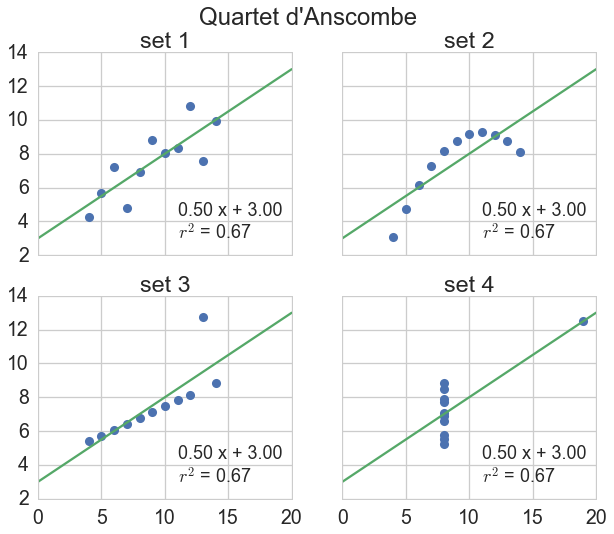

In [77]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex=True, sharey=True)
sns.set(style="whitegrid", context="talk", font_scale=1.5)
fig.suptitle("Quartet d'Anscombe", size=24)
axes = axes.reshape(4, )
i = 0
for ax, data in zip(axes, all_sets):
    x, y = data
    i += 1
    ax.plot(x, y, marker="o", linestyle="", label="set %d" % i)
    ax.set_title("set %d" % i)
    
    a, b, r, p_value, std_err = linregress(x, y)
    ax.plot([0, 20], [b, a*20 + b])
    ax.annotate(
        "%4.2f x + %4.2f\n$r^2$ = %4.2f" % (a, b, r**2),
        xy=(11, 3),
        fontsize=18
    )

plt.savefig("anscombe.png", dpi=300)

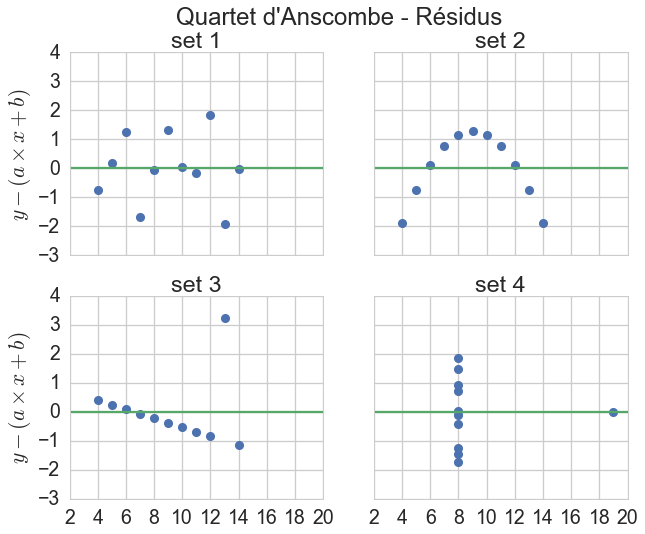

In [90]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex=True, sharey=True)
sns.set(style="whitegrid", context="talk", font_scale=1.5)
fig.suptitle("Quartet d'Anscombe - Résidus", size=24)
axes = axes.reshape(4, )
i = 0
for ax, data in zip(axes, all_sets):
    x, y = data
    i += 1
    a, b, r, p_value, std_err = linregress(x, y)
    
    ax.plot(x, y - a * x - b, marker="o", linestyle="")
    ax.set_title("set %d" % i)
    ax.plot([2, 20], [0, 0])
    ax.set_ylim(-3, 4)
    if i == 1 or i == 3:
        ax.set_ylabel(r"$y - (a \times x + b)$")

plt.savefig("anscombe-residus.png", dpi=300)